##### Importing libraries and Reading  Data

In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt


train_ds=pd.read_csv('train.csv')
test_ds=pd.read_csv('test.csv')


##### Viewing data

In [325]:
train_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [326]:
train_ds.shape

(891, 12)

### Data Cleaning and Preparation


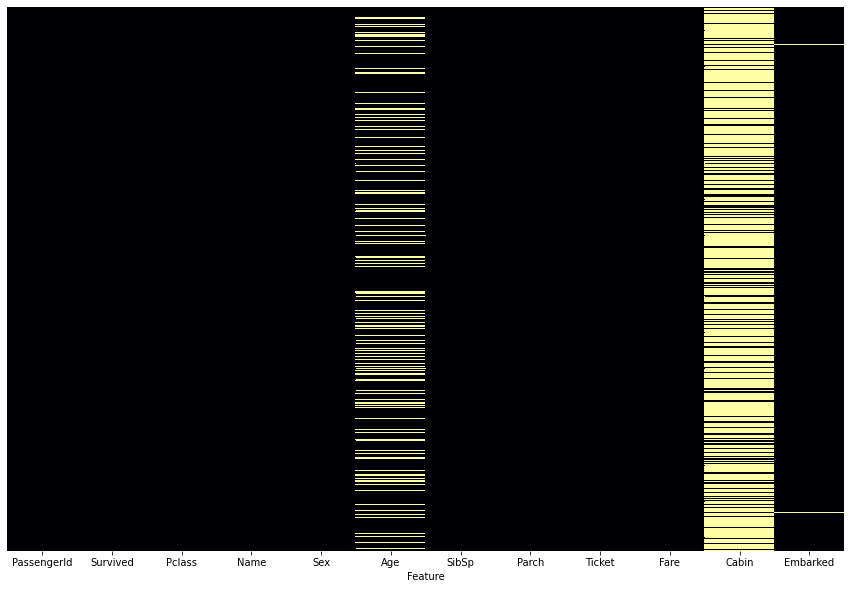

In [327]:
## Find features with missing values

plt.figure(figsize=(15,10))
sns.heatmap(train_ds.isna(),cbar=False, yticklabels=False, cmap='inferno')
plt.xlabel('Feature')
plt.show()

In [328]:
train_ds.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [329]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### finding which features has missing values

In [330]:
null= train_ds.isnull().sum()
null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### Filling in the null values

In [331]:
train_ds["Age"] = train_ds["Age"].fillna(train_ds["Age"].mean())
test_ds["Age"] = test_ds["Age"].fillna(test_ds["Age"].mean())
test_ds["Fare"] = test_ds["Fare"].fillna(test_ds["Fare"].mean())
train_ds["Cabin"] = train_ds["Cabin"].fillna(train_ds["Cabin"].mode()[0])
test_ds["Cabin"] = test_ds["Cabin"].fillna(test_ds["Cabin"].mode()[0])
train_ds["Embarked"] = train_ds["Embarked"].fillna(train_ds["Embarked"].mode()[0])

##### converting categorical features to numerical values

In [332]:
train_ds["Sex"] = [1 if i == "male" else 0 for i in train_ds["Sex"]] 
test_ds["Sex"] = [1 if i == "male" else 0 for i in test_ds["Sex"]]
train_ds["Embarked"] = [0 if i == "S" else i for i in train_ds["Embarked"]] 
train_ds["Embarked"] = [1 if i == "C" else i for i in train_ds["Embarked"]] 
train_ds["Embarked"] = [2 if i == "Q" else i for i in train_ds["Embarked"]] 
test_ds["Embarked"] = [0 if i == "S" else i for i in test_ds["Embarked"]]
test_ds["Embarked"] = [1 if i == "C" else i for i in test_ds["Embarked"]]
test_ds["Embarked"] = [2 if i == "Q" else i for i in test_ds["Embarked"]]

In [333]:
cols = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

##### Finding the corrolation between features for feature engineering

In [334]:
train_ds_corr = train_ds[cols].corr()
train_ds_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


Text(0.5, 1.0, 'cmap=Blues')

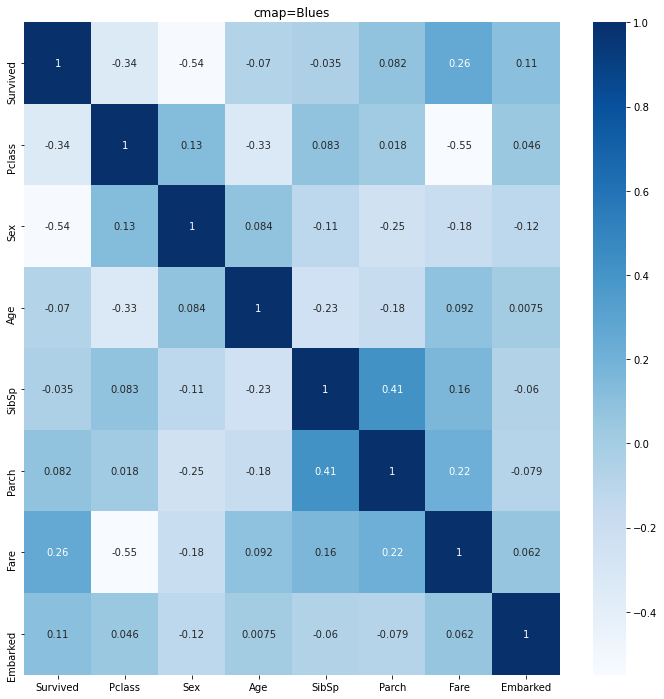

In [335]:
fig,(ax) = plt.subplots(nrows=1,figsize=(12,12))
sns.heatmap(train_ds_corr,annot=True,cmap="Blues")
ax.set_title("cmap=Blues")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

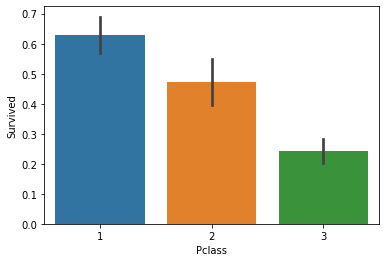

In [336]:
sns.barplot(x='Pclass', y='Survived', data=train_ds)

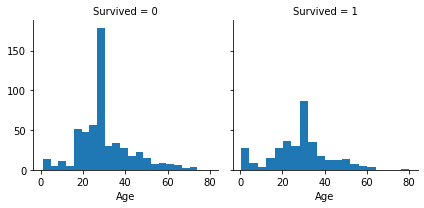

In [337]:
AS = sns.FacetGrid(train_ds, col='Survived')
AS.map(plt.hist, 'Age', bins=20)

### feature engineering

In [338]:
#sibsp and parch have the most corrolation so we join them and make new feature.
train_ds['Family'] = train_ds['SibSp'] + train_ds['Parch']


In [339]:
#train_ds.Sex.replace(('male','female'), (0,1), inplace = True)

In [340]:
#train_ds.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)
train_ds['Fare']=train_ds['Fare'].astype(int)


In [341]:
train_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7,B96 B98,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7,B96 B98,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8,B96 B98,0,0


In [342]:
## Find Numerical Features

numerical_f = [feature for feature in train_ds.columns if train_ds[feature].dtypes != 'object' and feature not in ['Survived','PassengerId']]
print("Total No Of Numerical Features:",len(numerical_f))

## print the numerical features top5 records
train_ds[numerical_f].head()

Total No Of Numerical Features: 8


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,1,22.0,1,0,7,0,1
1,1,0,38.0,1,0,71,1,1
2,3,0,26.0,0,0,7,0,0
3,1,0,35.0,1,0,53,0,1
4,3,1,35.0,0,0,8,0,0


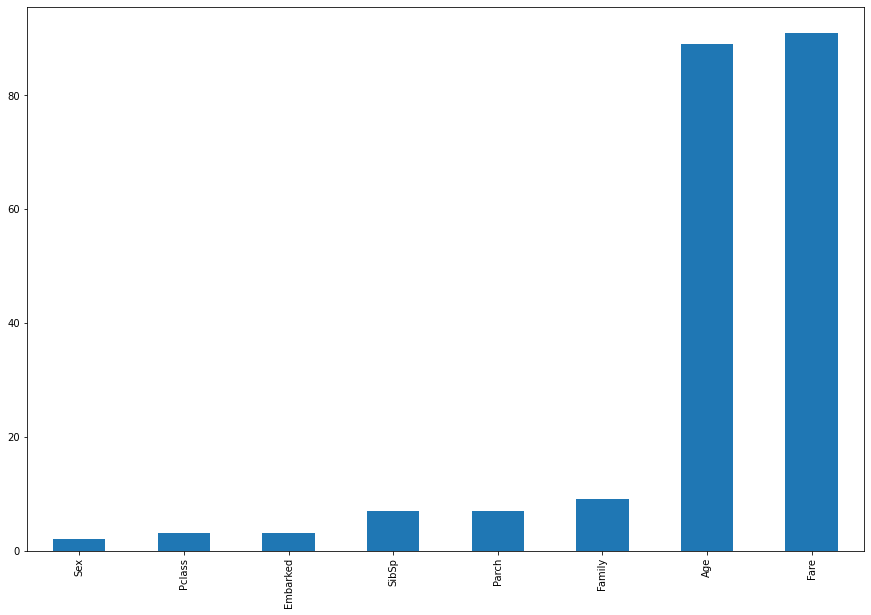

In [300]:
## Find the total no of unique vales in the numerical feature dataset

nf_uniquec = dict()

for feature in numerical_f:
    nf_uniquec[feature] = len(train_ds[feature].unique())
    
nf_uniquec = pd.Series(nf_uniquec)
nf_uniquec.sort_values(inplace=True)
nf_uniquec.plot(kind='bar',figsize=(15,10))
plt.show()

In [343]:
train_ds = train_ds.drop(['PassengerId'], axis=1)

In [344]:
train_ds.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,31.785634,0.361392,0.904602
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.703730,0.635673,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.000000,2.000000,10.000000
